In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('data/clean_hanan.csv')  # Assuming a CSV file with a 'text' column
data

,full_text
0,ada yg sepemikiran ternyata kalo bahlil mirip...
1,bener perihh lidahkuu jirr apaa ak di adzab ka...
2,orangorang kagak jelas kaya budie arie bahlil ...
3,gus bahlil alpapuani
4,kalau bahlil ini masuk golongan udah jelek to...
...,...
1007,fotonya gak enak diliat kek bahlil
1008,baik hati sekali gus bahlil ini
1009,bahlil belum tentu orang ganteng itu cerdas ya...
1010,bahlil mah enak ga pusing kostum helloween _


In [3]:
#call id stopwords
list_stopwords = stopwords_scratch.words('indonesian')
#call stopwords english
list_stopwords_en = stopwords_scratch.words('english')
# combine stopwords
list_stopwords.extend(list_stopwords_en)
#add custom stopwords
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n','loh','kok'])
stopwords = list_stopwords

In [4]:
data = data.full_text.to_list()
data[:10]

[' ada yg sepemikiran ternyata kalo bahlil mirip smeagol',
 'bener perihh lidahkuu jirr apaa ak di adzab karna ngontolin bahlil ymaapin pak uda dong sakit bgt ini',
 'orangorang kagak jelas kaya budie arie bahlil dan beberapa orang lain itu bisa jadi menteri modal jadi projo belum orang ga capable banyak jadi komisaris ya dimulainya era jokowi benerbener bajingan',
 '  gus bahlil alpapuani',
 ' kalau bahlil ini masuk golongan udah jelek tolol pula ',
 'emang ada yang mau nyium bau si bahlil',
 '  bahlil mendunia',
 '  kalau yang ini bukan abah bahli tapi gus bahlil memang orangnya agak mirip ',
 ' aku ngucapin krna lewat tl dan takut mimpiin bahlil so happy bday ya wish u all the best',
 '  kita sefrekuensi kalau soal bahlil']

In [5]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data[:100])

e:\AppWeb\be better\envy\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [6]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

,n_clusters,8
,init,'k-means++'
,n_init,1
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [7]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
#get feature names
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

Cluster 0:
 loserpool
 kah
 terkenal
 memasak
 rashford
 bajingan
 hayo
 dicek
 detikfinance
 cb

Cluster 1:
 ngga
 sejalan
 kepentingan
 duanya
 salah
 bahlil
 tunjangan
 tukin
 tuhan
 tu

Cluster 2:
 salah
 bahlil
 tw
 tuntut
 tunjangan
 tukin
 tuhan
 tu
 tsb
 trs

Cluster 3:
 bahlil
 lahadalia
 etika
 pengen
 muka
 bahlul
 gibran
 kek
 smeagol
 kirain

Cluster 4:
 ganteng
 orang
 bahlil
 cerdas
 kaya
 tuntut
 terhina
 org
 sungguh
 negeri

Cluster 5:
 meme
 gue
 ngakak
 bahlil
 pembuat
 anjir
 ditangkap
 awas
 lo
 viral

Cluster 6:
 abah
 anak
 orangnya
 bahli
 gus
 rambut
 pertanyaannya
 gondrong
 bahlil
 pendukung

Cluster 7:
 jelek
 tolol
 bahlil
 cerdas
 udah
 gw
 menteri
 emang
 wkwk
 jahat



In [8]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

0.0077380339364931505

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=0)
reduced_data = pca.fit_transform(X.toarray())

reduced_cluster_centers = pca.transform(model.cluster_centers_)

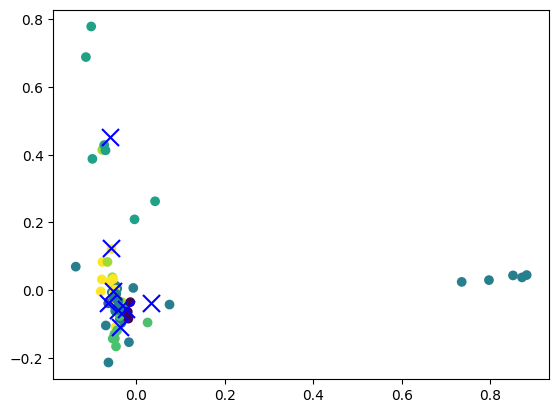

In [10]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='x', s=150, c='b')